In [1]:
from os import getcwd
from os.path import abspath, join

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import numpy as np
import pickle

In [2]:
data_dir = abspath(join(getcwd(), '../../'))

In [27]:
## set the matplotlib params
mpl.rcParams['xtick.major.size'] = 14
mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# set plotting params
s, f = 5, 2
models = ['V1', 'classical', 'incompatible']
colors = {'V1': '#2c7fb8', 'classical': '#d95f02', 'incompatible': '#91cf60'}
h, lr, n_epochs = 1000, 0.1, 3001

### Load saved results from initializing networks

In [28]:
load_dir = data_dir + '/models/results/'

# load mnist results
with open(load_dir + '/initialize_mnist/clf_s=%0.2f_f=%0.2f_GD_torch.pickle' % (s, f), 'rb') as handle:
    mnist_clf = pickle.load(handle)
    
# load kmnist results
with open(load_dir + '/initialize_kmnist/clf_s=%0.2f_f=%0.2f_GD_torch.pickle' % (s, f), 'rb') as handle:
    kmnist_clf = pickle.load(handle)

## Plot MNIST results

### train loss

V1, 0.0705
classical, 0.1075
incompatible, 0.1234


(-0.06, 1.5)

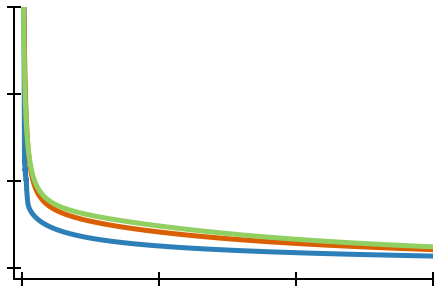

In [29]:
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for m in models:
    avg_loss = mnist_clf[m]['train_loss'][h][lr]['mean']
    std_err = mnist_clf[m]['train_loss'][h][lr]['std']
    plt.plot(np.arange(n_epochs), avg_loss, label=m, lw=5, c=colors[m])
    plt.fill_between(np.arange(n_epochs), avg_loss - std_err, avg_loss + std_err, alpha=0.2)
    print('%s, %0.4f' % (m, avg_loss[-1]))
    
plt.yticks(np.arange(0, 10, 0.5))
plt.xticks(np.arange(0, 3001, 1000))
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.xlim([-60, 3001])
plt.ylim([-0.06, 1.5])
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_8/init_GD_mnist_loss.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

### test error

V1, 0.0225
classical, 0.0347
incompatible, 0.0373


(-0.02, 0.5)

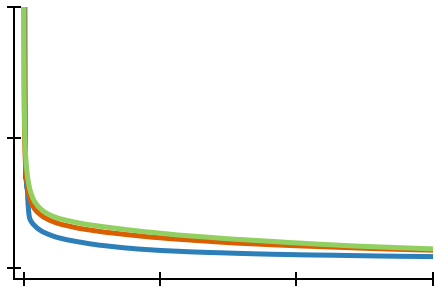

In [30]:
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for m in models:
    avg_err = 1 - mnist_clf[m]['test_accuracy'][h][lr]['mean']
    std_err = mnist_clf[m]['test_accuracy'][h][lr]['std']
    plt.plot(np.arange(n_epochs), avg_err, label=m, lw=5, c=colors[m])
    plt.fill_between(np.arange(n_epochs), avg_err - std_err, avg_err + std_err, alpha=0.2)
    print('%s, %0.4f' % (m, avg_loss[-1]))
    
plt.yticks(np.arange(0, 1.01, 0.25))
plt.xticks(np.arange(0, 3001, 1000))
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.xlim([-70, 3000])
plt.ylim([-0.02, 0.5])
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_8/init_GD_mnist_loss.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

## Plot KMNIST results

### train loss

V1, 0.0989
classical, 0.1441
incompatible, 0.1690


(-0.06, 1.5)

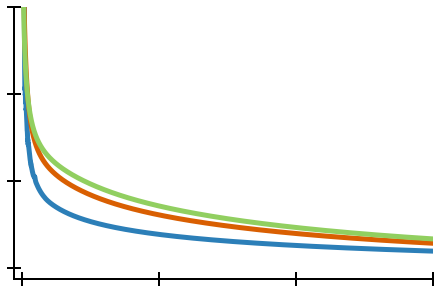

In [31]:
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for m in models:
    avg_loss = kmnist_clf[m]['train_loss'][h][lr]['mean']
    std_err = kmnist_clf[m]['train_loss'][h][lr]['std']
    plt.plot(np.arange(n_epochs), avg_loss, label=m, lw=5, c=colors[m])
    plt.fill_between(np.arange(n_epochs), avg_loss - std_err, avg_loss + std_err, alpha=0.2)
    print('%s, %0.4f' % (m, avg_loss[-1]))
    
plt.yticks(np.arange(0, 10, 0.5))
plt.xticks(np.arange(0, 3001, 1000))
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.xlim([-60, 3001])
plt.ylim([-0.06, 1.5])
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_8/init_GD_kmnist_loss.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

### test error

V1, 0.0995
classical, 0.1345
incompatible, 0.1448


(-0.02, 0.5)

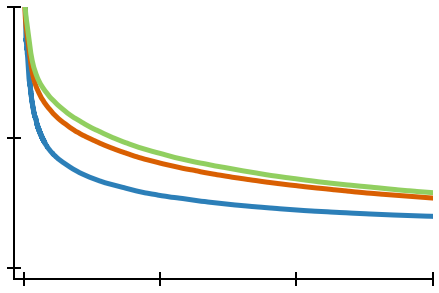

In [32]:
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for m in models:
    avg_err = 1 - kmnist_clf[m]['test_accuracy'][h][lr]['mean']
    std_err = kmnist_clf[m]['test_accuracy'][h][lr]['std']
    plt.plot(np.arange(n_epochs), avg_err, label=m, lw=5, c=colors[m])
    plt.fill_between(np.arange(n_epochs), avg_err - std_err, avg_err + std_err, alpha=0.2)
    print('%s, %0.4f' % (m, avg_loss[-1]))
    
plt.yticks(np.arange(0, 1.01, 0.25))
plt.xticks(np.arange(0, 3001, 1000))
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.xlim([-70, 3000])
plt.ylim([-0.02, 0.5])
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_8/init_GD_kmnist_test_err.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)